In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
import kagglehub
import os

In [ ]:
path = kagglehub.dataset_download("mirajdeepbhandari/polynomial-regression")

print("Path to dataset files:", path)
print(os.listdir(path))

Path to dataset files: /kaggle/input/polynomial-regression
['Ice_cream selling data.csv']


In [ ]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/mirajdeepbhandari/polynomial-regression/versions/1/Ice_cream selling data.csv')

In [ ]:
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [ ]:
df.isnull().sum()

,0
Temperature (°C),0
Ice Cream Sales (units),0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.dtypes

,0
Temperature (°C),float64
Ice Cream Sales (units),float64


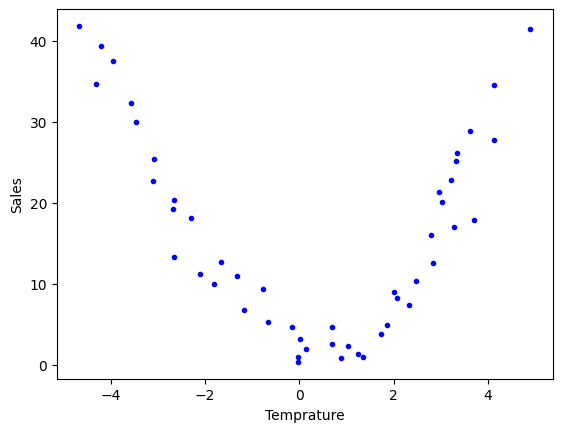

In [ ]:
plt.plot(df['Temperature (°C)'],df['Ice Cream Sales (units)'],'b.')
plt.xlabel('Temprature')
plt.ylabel('Sales')
plt.show()

<h2> Lets first see what simple linear regression do </h2>

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df['Temperature (°C)'],df['Ice Cream Sales (units)'],test_size=0.2,random_state=2)

In [ ]:
x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1) #reshaping data to fit in model

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
predictions = lr.predict(x_test)

In [ ]:
print("R2 score of model is ", r2_score(y_test,predictions)) #r2 score is in minise it mean y mean line perform even better

R2 score of model is  -0.13770440138887952


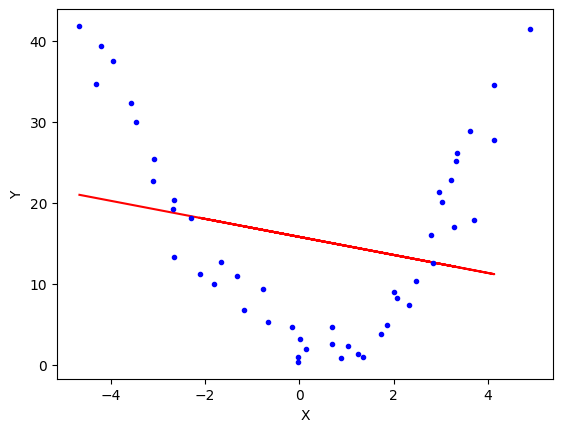

In [ ]:
plt.plot(x_test,predictions,color = 'r')
plt.plot(df['Temperature (°C)'],df['Ice Cream Sales (units)'],'b.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show() #this is the line passing

Lets apply polynomial regressioin

In [ ]:
poly = PolynomialFeatures(degree=2) #degree is 2 lets change it to 3 and result will get worst so 2 is best as of now
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test) #transforming the values to power to get curve

In [ ]:
x_train[0]

array([-4.21398476])

In [ ]:
x_train_poly[0] #here we have 3 values power0, power1, power2

array([ 1.        , -4.21398476, 17.7576676 ])

In [ ]:
lr.fit(x_train_poly,y_train)

LinearRegression()

In [ ]:
predictionsN = lr.predict(x_test_poly)

In [ ]:
print("R2 score is ", r2_score(y_test,predictionsN)) #now the error is so good like amazing

R2 score is  0.9194674262782349


In [ ]:
print(lr.coef_)
print(lr.intercept_) #we can see three values of M for each power seperate

[ 0.         -0.96115771  1.86322401]
2.7362265943007245


In [ ]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

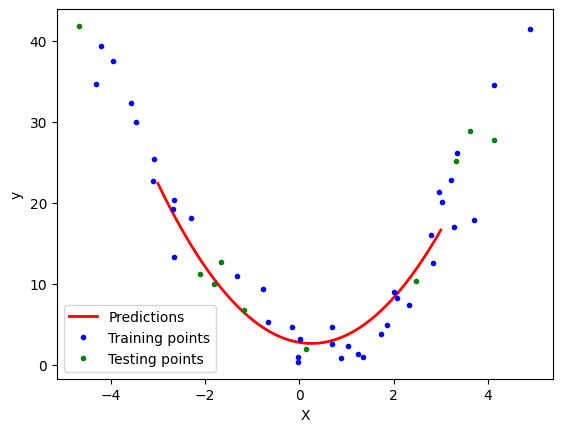

In [ ]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show() #now it is a proper curve